## What is NLP

**Natural Language Processing**, usually shortened as NLP, is a branch of artificial intelligence that deals with the interaction between computers and humans using the natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of the human languages in a manner that is valuable

### The Process of Natural Language Understanding (Text Classification)¶
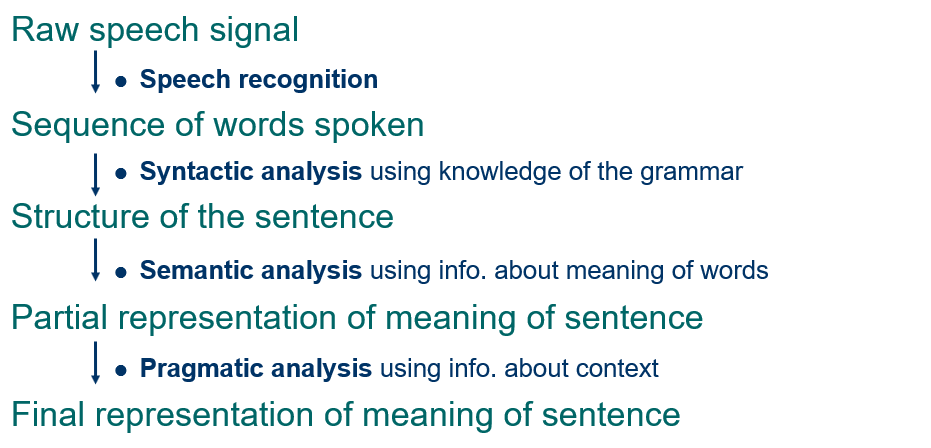

### Sentence Breakdown¶
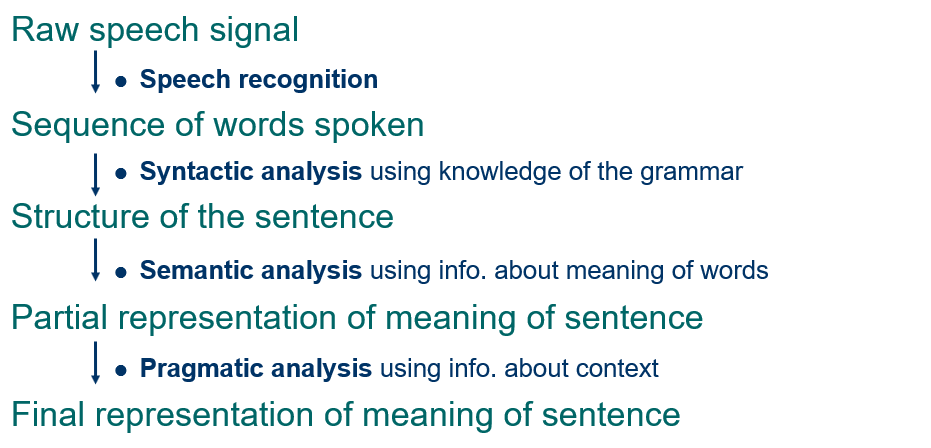

### Natural Language Generation¶
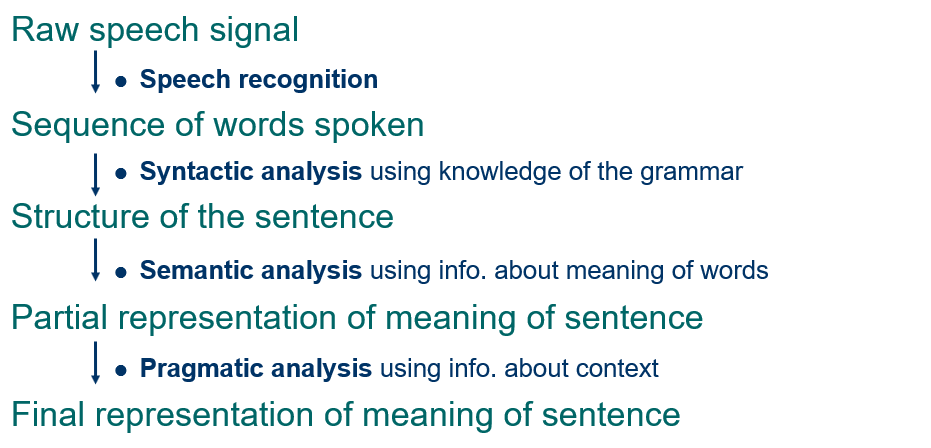

### Data Cleaning Options
- Case Normalization
- Removing Stop Words
- Removing Punctuations or Special Symbols
- Lemmatization or Stemming
- Parts of Speech Tagging
- Entity Detection
- Bag of Words
- Word-to-Vec

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.tsv.txt', sep='\t')

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(data)

5572

In [7]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

As you can see data is highly imbalanced

In [8]:
# balance the data
ham = data[data['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [9]:
spam = data[data['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## EDA

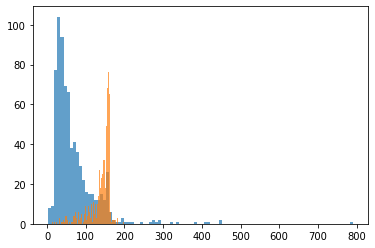

In [14]:
plt.hist(data[data['label']=='ham']['length'], bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)

plt.show()

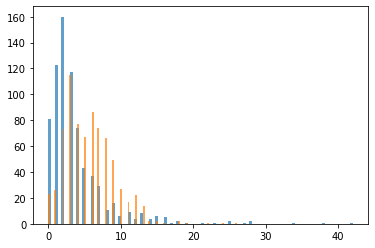

In [15]:

plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

### Data Preparation

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [21]:
data.head()

,label,message,length,punct
0,ham,Let me know if you need anything else. Salad o...,98,5
1,ham,"Sorry I flaked last night, shit's seriously go...",95,4
2,ham,U studying in sch or going home? Anyway i'll b...,65,3
3,ham,HELLO PEACH! MY CAKE TASTS LUSH!,32,2
4,ham,Wat r u doing now?,18,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size=0.3, random_state=0, shuffle=True, stratify = data['label'])

In [23]:
# Bag of words creation
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [25]:
X_train_vect.shape

(1045, 3654)

In [26]:
X_train_vect


<1045x3654 sparse matrix of type '<class 'numpy.float64'>'
	with 17671 stored elements in Compressed Sparse Row format>

In [27]:
1045*3708


3874860

### Pipeline and RF

In [28]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [29]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [30]:
y_pred = clf.predict(X_test)


In [31]:
confusion_matrix(y_test, y_pred)


array([[224,   1],
       [ 26, 198]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.90      1.00      0.94       225
        spam       0.99      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [33]:
accuracy_score(y_test, y_pred)


0.9398663697104677

In [34]:
clf.predict(["Hey, whassup?"])


array(['ham'], dtype=object)

In [35]:
clf.predict(["you have won tickets to the USA this summer."])


array(['ham'], dtype=object)

### SVM

In [37]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=1000, gamma='auto'))])

In [38]:
clf.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [39]:
y_pred = clf.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 17, 207]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       225
        spam       0.99      0.92      0.96       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [42]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [43]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [44]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)